In [2]:
import scipy
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import os
from scipy.io import loadmat, savemat
from matplotlib.colors import LogNorm

In [2]:
# csv = pd.read_csv('cleaned_data.csv')

In [3]:
# x = csv.lon
# y = csv.lat
# values = csv["Peak Current[kA]"]

In [4]:
# H, xedges, yedges, binnumber = scipy.stats.binned_statistic_2d(x, y, values, statistic="count", bins=100, range=None, expand_binnumbers=False)

In [5]:
#XX, YY = np.meshgrid(xedges, yedges)
# fig = plt.figure(figsize = (13,7))
# XX, YY = np.meshgrid(xedges, yedges)
# H = np.ma.masked_where(H==0, H) #masking where there was no data

# plt.pcolormesh(XX,YY,H.T)
# plt.colorbar()
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# plt.title("Histogram (counts)");

In [6]:
# m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
#             llcrnrlon=-180,urcrnrlon=180,resolution='c')

# lons = csv.lon
# lats = csv.lat
# x, y = m(lons, lats)
# H, xedges, yedges, binnumber = scipy.stats.binned_statistic_2d(x, y, values, statistic="count", bins=500, range=None, expand_binnumbers=False)
# H = np.ma.masked_where(H==0, H) # wamasking where there was no data
# XX, YY = np.meshgrid(xedges, yedges)

# np.savez('./2DHistogramData/test', H=H, XX=XX, YY=YY)

# CS = m.pcolormesh(XX,YY, H.T, alpha = 0.7, shading='auto',cmap=plt.cm.tab20c)
# # draw coastlines, lat/lon lines.
# m.drawcoastlines()

# m.drawparallels(np.arange(-90.,120.,30.))
# m.drawmeridians(np.arange(0.,360.,60.))

# m.colorbar(location="bottom",label="Counts") # draw colorbar
# plt.title('histogram2d', fontsize=20)

# plt.gcf().set_size_inches(18,10)
# plt.show()

In [7]:
#filePathsByMonth = {"01": [], "02": [],"03": [],"04":[],"05":[],"06":[],"07":[],"08":[],"09":[],"10":[],"11":[],"12":[]}

# # GET ALL FILE PATHS in GLD_cleaned FOLDER
# GLD_cleaned_path = r'/Volumes/lairdata/lightningdata/GLD_cleaned/'
# allFolders = os.listdir(GLD_cleaned_path) # gets list of all folders in GLD_cleaned

# for folderDate in allFolders: # getting file paths by month
#     date = folderDate.split("-")
#     month = date[1]
    
#     fileInFolder = os.listdir(GLD_cleaned_path + str(folderDate)) 
#     pathToFile = GLD_cleaned_path + str(folderDate) + "/" + fileInFolder[0]
    
#     filePathsByMonth[month].append(pathToFile)


# # GET ALL FILE PATHS in FROM_ALEXANDRIA FOLDER
# FROM_ALEXANDRIA_path = r'/Volumes/lairdata/lightningdata/From Alexandria/GLD_cleaned/Matlab/'
# Folders = os.listdir(FROM_ALEXANDRIA_path)

# for folder in Folders:
#     if not folder.startswith('.'): # getting list of all file names
#         AllFiles = os.listdir(FROM_ALEXANDRIA_path + '/' + folder)
        
#         for filename in AllFiles: # extracting month from each and adding to filePathsByMonth dictionary
#             date = ''.join(filter(str.isdigit, filename))
#             month = date[4:6]
#             pathToFile = FROM_ALEXANDRIA_path + folder + '/' + filename
#             #print(pathToFile)
#             filePathsByMonth[month].append(pathToFile)

# SAVING ALL FILE NAMES BY MONTH
#np.save('./2DHistogramData/filePathsByMonth', filePathsByMonth) 

In [8]:
# ret = np.load('./2DHistogramData/filePathsByMonth.npy', allow_pickle='TRUE')
# AllFilePathsByMonth = ret.item() 

In [9]:
# filePathsBySeason = {"Winter": [], "Spring": [], "Summer": [], "Fall": []}

# for month, filepaths in AllFilePathsByMonth.items():
#     if month == "12" or month == "01" or month == "02":
#         filePathsBySeason["Winter"] += filepaths
#     elif month == "03" or month == "04" or month == "05":
#         filePathsBySeason["Spring"] += filepaths
#     elif month == "06" or month == "07" or month == "08":
#         filePathsBySeason["Summer"] += filepaths 
#     elif month == "09" or month == "10" or month == "11":
#         filePathsBySeason["Fall"] += filepaths

# #SAVING ALL FILE NAMES BY MONTH
# np.save('./2DHistogramData/filePathsBySeason', filePathsBySeason) 

In [10]:
# for month, filePaths in AllFilePathsByMonth.items():
#     # loading data for each file in given month and concatenate to one dataframe
#     concat = []
#     for path in filePaths:  
#         mat_contents=loadmat(path)
#         data = mat_contents.get("flashes")
#         concat = np.append(concat, data)
        
#     #print(concat)
#     df = pd.DataFrame(np.array(concat), columns=['UTC timestamp', 'nanoseconds', 'lat', 'lon', 'Peak Current[kA]'])
    
#     # computing histogram data for each month
#     x, y = m(df.lon, df.lat)
#     H, xedges, yedges, binnumber = scipy.stats.binned_statistic_2d(x, y, values, statistic="count", bins=100, range=None, expand_binnumbers=False)
#     H = np.ma.masked_where(H==0, H) # masking where there was no data
#     XX, YY = np.meshgrid(xedges, yedges)

#     # saving data for one file
#     filePath= '../LightningResearch/2DHistogramData/' + month + '.npz'
#     np.savez(filePath, H=H, XX=XX, YY=YY)

In [11]:
# ret = np.load('./2DHistogramData/filePathsBySeason.npy', allow_pickle='TRUE')
# AllFilePathsBySeason = ret.item() 

In [12]:
# # COMPUTING DATA FOR WINTER
# concat = []
# for filePath in AllFilePathsBySeason["Winter"]: # loading data for each file in given season and concatenate to one dataframe
#     mat_contents=loadmat(filePath, variable_names=['flashes'])
#     data = np.array(mat_contents.get("flashes"))
#     for d in data:
#         concat.append(d)
        
# # computing histogram data for winter
# df = pd.DataFrame(np.array(concat), columns=['UTC timestamp', 'nanoseconds', 'lat', 'lon', 'Peak Current[kA]'])
# x, y = m(df.lon, df.lat)
# values = df['Peak Current[kA]']
# H, xedges, yedges, binnumber = scipy.stats.binned_statistic_2d(x, y, values, statistic="count", bins=100, range=None, expand_binnumbers=False)
# H = np.ma.masked_where(H==0, H) # masking where there was no data
# XX, YY = np.meshgrid(xedges, yedges)

# # plotting data
# m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90, llcrnrlon=-180,urcrnrlon=180,resolution='c')

# CS = m.pcolormesh(XX,YY,H.T, alpha = 0.85, shading='auto', cmap=plt.cm.viridis)
# m.drawcoastlines()# draw coastlines, lat/lon lines.
# m.drawparallels(np.arange(-90.,120.,30.))
# m.drawmeridians(np.arange(0.,360.,60.))
# m.colorbar(location="right",label="Counts") # draw colorbar
# plt.title('Dec/Jan/Feb Peak Current[kA] Counts (2012-2018)', fontsize=25)
# plt.xlabel('Longitude', fontsize=20)
# plt.ylabel('Latitude', fontsize=20)
# plt.gcf().set_size_inches(18,10)

# # saving plot
# plt.savefig('./2DHistogramData/winterPlots.png')

# # saving data 
# file= '../LightningResearch/2DHistogramData/Winter.npz'
# np.savez(file, H=H, XX=XX, YY=YY)

In [13]:
# mat_contents = loadmat('GLD20180709cleaned.mat') 
# data = mat_contents.get("flashes")
# np_array = np.array(data)
# df = pd.DataFrame(np_array, columns=['UTC timestamp', 'nanoseconds', 'lat', 'lon', 'Peak Current[kA]'])
# x, y = m(df.lon, df.lat)
# H, xedges, yedges, binnumber = scipy.stats.binned_statistic_2d(x, y, values, statistic="count", bins=100, range=None, expand_binnumbers=False)
# H = np.ma.masked_where(H==0, H) # masking where there was no data
# XX, YY = np.meshgrid(xedges, yedges)


In [14]:
# d = np.load('./2DHistogramData/test.npz')

# # lst = d.files
# # for item in lst:
# #     print(d[item])

# m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
#             llcrnrlon=-180,urcrnrlon=180,resolution='c')

# CS = m.pcolormesh(d["XX"],d["YY"], d["H"].T, alpha = 0.85, shading='auto',cmap=plt.cm.viridis)
# # draw coastlines, lat/lon lines.
# m.drawcoastlines()

# m.drawparallels(np.arange(-90.,120.,30.))
# m.drawmeridians(np.arange(0.,360.,60.))

# m.colorbar(location="right",label="Counts") # draw colorbar
# plt.title('Dec/Jan/Feb Peak Current[kA] Counts', fontsize=25)
# plt.xlabel('Longitude', fontsize=20)
# plt.ylabel('Latitude', fontsize=20)
# plt.gcf().set_size_inches(18,10)

# plt.show()

In [8]:
# #GETTING FILE PATHS BY MONTH FOR GLD_CLEANED FOLDER
# filePathsByMonth = {"01": [], "02": [],"03": [],"04":[],"05":[],"06":[],"07":[],"08":[],"09":[],"10":[],"11":[],"12":[]}
# for folderDate in allFolders: # getting file paths by month
#     split = folderDate.split("-")
#     date = split[1]
#     month = date[4:6]

#     pathToFile = path2018 + str(folderDate)
#     filePathsByMonth[month].append(pathToFile)

# #SAVING ALL FILE NAMES BY MONTH
# np.save('filePathsMonth2015', filePathsByMonth) 

# #GETTING FILE PATHS BY SEASON FOR GLD_CLEANED FOLDER
# filePathsBySeason = {"Winter": [], "Spring": [], "Summer": [], "Fall": []}
# dictionary = np.load('filePathsMonth2015.npy', allow_pickle = True)
# pathsByMonth = dictionary.item()
# for month, filepaths in pathsByMonth.items():
#     if month == "12" or month == "01" or month == "02":
#         filePathsBySeason["Winter"] += filepaths
#     elif month == "03" or month == "04" or month == "05":
#         filePathsBySeason["Spring"] += filepaths
#     elif month == "06" or month == "07" or month == "08":
#         filePathsBySeason["Summer"] += filepaths 
#     elif month == "09" or month == "10" or month == "11":
#         filePathsBySeason["Fall"] += filepaths

# np.save('filePathsSeason2015', filePathsBySeason) 


In [8]:
# dictionary = np.load('2015/filePathsSeason2015.npy', allow_pickle = True)
# pathsBySeason = dictionary.item()
#print(pathsBySeason)

In [105]:
# #concat = np.array([])
# count = 0
# for month, pathnames in pathsByMonth.items():
#     if pathnames:
#         if count == 0:
#             mat_contents=loadmat(pathnames[0])
#             data = mat_contents.get("flashes")
#             dictionary = {"flashes": data}
#             savemat("2013.mat", dictionary)

#             for path in pathnames[1:]:
#                 # mat_contents=loadmat(path)
#                 # data = mat_contents.get("flashes")
#                 # concat = np.append(concat, data)
#                 # print(path)
#                 accumulate = loadmat("2013.mat").get("flashes")
#                 mat_contents=loadmat(path).get("flashes")

#                 concat = np.concatenate((accumulate, mat_contents))
#                 dictionary = {"flashes": concat}
#                 savemat("2013.mat", dictionary)

#             count = 1
#         else: 
#             for path in pathnames:
#                 # mat_contents=loadmat(path)
#                 # data = mat_contents.get("flashes")
#                 # concat = np.append(concat, data)
#                 # print(path)
#                 accumulate = loadmat("2013.mat").get("flashes")
#                 mat_contents=loadmat(path).get("flashes")

#                 concat = np.concatenate((accumulate, mat_contents))
#                 dictionary = {"flashes": concat}
#                 savemat("2013.mat", dictionary)

In [3]:
dictionary = np.load('2015/filePathsSeason2015.npy', allow_pickle = True)
pathsBySeason = dictionary.item()
#print(pathsBySeason)

In [4]:
# concat=loadmat(pathsBySeason["Fall"][0]).get("flashes")

# for index in range(1,len(pathsBySeason["Fall"])):
#     flashes=loadmat(pathsBySeason["Fall"][index]).get("flashes")
#     concat = np.concatenate((concat, flashes))

# # computing histogram data
# m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90, llcrnrlon=-180,urcrnrlon=180,resolution='c')
# df = pd.DataFrame(concat, columns=['UTC timestamp', 'nanoseconds', 'lat', 'lon', 'Peak Current[kA]'])
# x, y = m(df.lon, df.lat)
# values = df['Peak Current[kA]']
# H, xedges, yedges, binnumber = scipy.stats.binned_statistic_2d(x, y, values, statistic="count", bins=100, range=None, expand_binnumbers=False)
# #H = np.ma.masked_where(H==0, H) # masking where there was no data
# XX, YY = np.meshgrid(xedges, yedges)

# np.savez('2015/Fall', XX=XX, YY=YY,H=H)

In [6]:
# allSeasons = os.listdir(path) # gets list of all folders in GLD_cleaned

# # for season in allSeasons:
# #     allFiles = os.listdir(path2018 + season)
# #     flashData = np.load(path2018 + season + '/' + allFiles[0])
# #     for file in allFiles[1:]:
# #         data = np.load(path2018 + season + '/' + file)
# #         flashData = np.concatenate((data, flashData))

# # computing histogram data
# m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90, llcrnrlon=-180,urcrnrlon=180,resolution='c')
# df = pd.DataFrame(flashData, columns=['UTC timestamp', 'nanoseconds', 'lat', 'lon', 'Peak Current[kA]'])
# x, y = m(df.lon, df.lat)
# values = df['Peak Current[kA]']
# H, xedges, yedges, binnumber = scipy.stats.binned_statistic_2d(x, y, values, statistic="count", bins=100, range=None, expand_binnumbers=False)
# #H = np.ma.masked_where(H==0, H) # masking where there was no data
# XX, YY = np.meshgrid(xedges, yedges)

# np.savez('springplottingData', XX=XX, YY=YY,H=H)

In [7]:
def plot(year, file, count):
    # computing histogram data for winter
    H = file["H"]
    H = np.ma.masked_where(H==0, H) # masking where there was no data
    XX = file["XX"]
    YY = file["YY"]
    
    # plotting data    
    plt.subplot(2,2,count)

    m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90, llcrnrlon=-180,urcrnrlon=180,resolution='c')

    CS = m.pcolormesh(XX,YY,H.T, alpha = 0.85, shading='auto', cmap=plt.cm.viridis, norm = LogNorm(vmin = np.nanmin(H), vmax = np.nanmax(H)))
    m.drawcoastlines()# draw coastlines, lat/lon lines.
    m.drawparallels(np.arange(-90.,90.,30.), labels=[1,1,0,1])
    m.drawmeridians(np.arange(-180.,180.,60.), labels=[1,1,0,1], rotation=45)
    cb = m.colorbar(CS,location = "bottom",label="Counts",size="5%", pad='15%') # draw colorbar

    if season == "Winter":
        plt.title('Dec/Jan/Feb Peak Current[kA] Counts ({})'.format(year), fontsize=20)
        plt.xlabel('Longitude',labelpad=30, fontsize=15)
        plt.ylabel('Latitude',labelpad=40, fontsize=15)
    elif season == "Spring":
        plt.title('March/April/May Peak Current[kA] Counts({})'.format(year), fontsize=20)
        plt.xlabel('Longitude', labelpad=30,fontsize=15)
        plt.ylabel('Latitude', labelpad=40,fontsize=15)
    elif season == "Summer":
        plt.title('June/July/August Peak Current[kA] Counts({})'.format(year), fontsize=20)
        plt.xlabel('Longitude', labelpad=30,fontsize=15)
        plt.ylabel('Latitude', labelpad=40,fontsize=15)
    elif season == "Fall":
        plt.title('Sept/Oct/Nov Peak Current[kA] Counts({})'.format(year), fontsize=20)
        plt.xlabel('Longitude', labelpad=30, fontsize=15)
        plt.ylabel('Latitude', labelpad=40, fontsize=15)

    plt.gcf().set_size_inches(20,12)

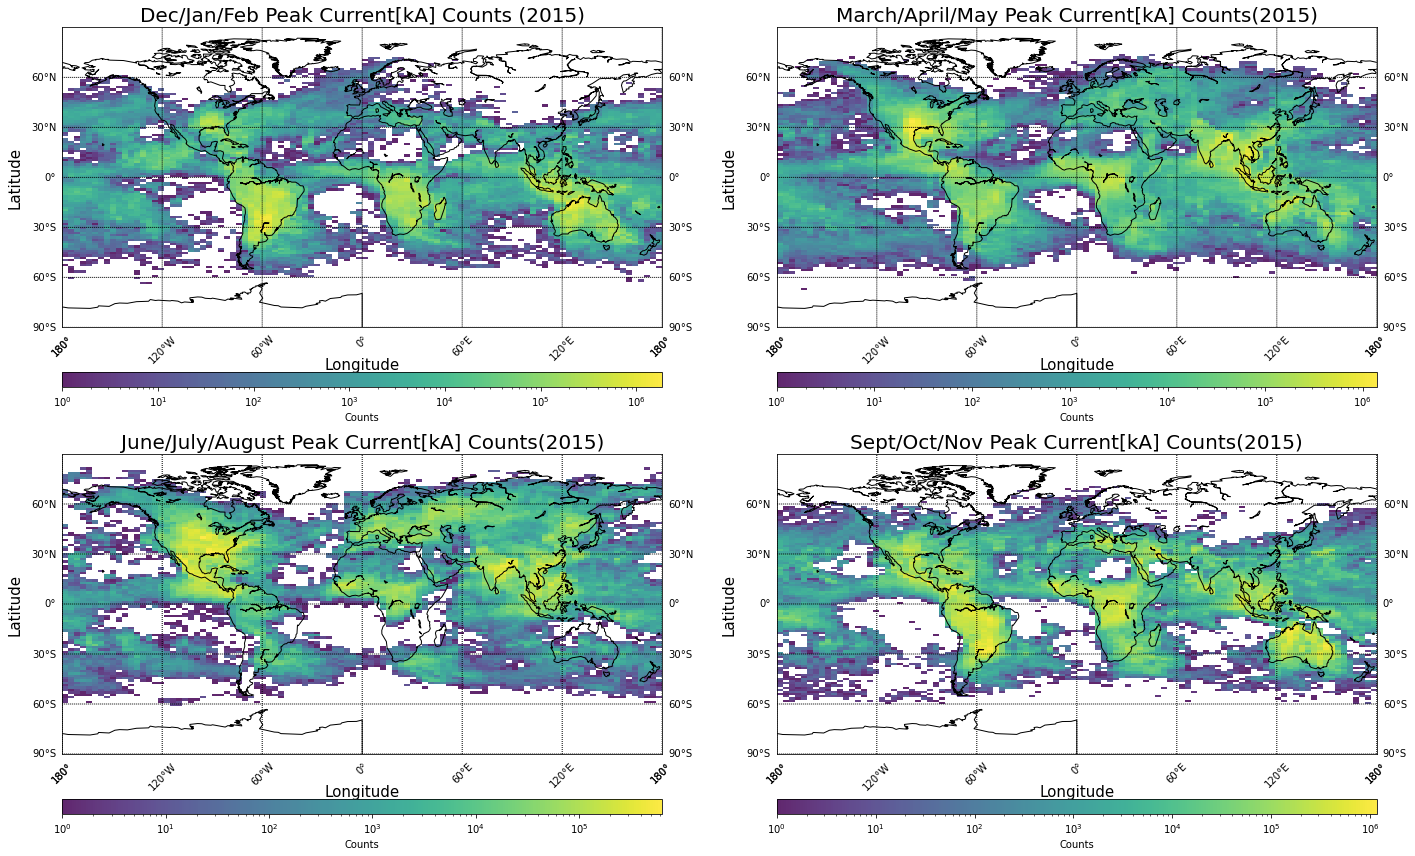

In [11]:
count = 0
for season in pathsBySeason.keys():
    file = np.load("2015/"+season+".npz") # passing in scipy stats data to plotting function
    count += 1
    plot(year = 2015, file = file, count=count)

plt.tight_layout()
plt.savefig("2015/2015PeakCurrentOccurence", facecolor='w')


In [7]:
#print(pathsBySeason["Fall"])
# data1 = np.load('1Spring.npy')
# data2 = np.load('2Spring.npy')
# data3 = np.load('3Spring.npy')
# data4 = np.load('4Spring.npy')